# Import the dependencies

pip install insightface

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import glob
import cv2

import insightface
from insightface.app import FaceAnalysis

# Detect the faces

In [2]:
model_pack_name = 'buffalo_l'
app = FaceAnalysis(name=model_pack_name)
app.prepare(ctx_id=0, det_size=(640,640))

C:\Users\ariji\Desktop\Insightface\insightface\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ariji/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ariji/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ariji/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ariji/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\ariji/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [3]:
india=cv2.imread('india.jpg')

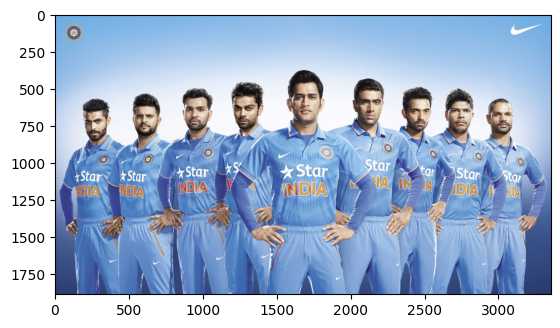

In [4]:
plt.imshow(cv2.cvtColor(india, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
faces=app.get(india)

In [6]:
len(faces)

9

In [7]:
faces[0]

{'bbox': array([ 875.5285,  563.7885, 1037.6156,  772.6848], dtype=float32),
 'kps': array([[908.76495, 638.48987],
        [986.2448 , 638.9481 ],
        [942.7548 , 681.989  ],
        [916.4478 , 719.6058 ],
        [977.8103 , 720.0371 ]], dtype=float32),
 'det_score': 0.90923166,
 'landmark_3d_68': array([[ 8.75710266e+02,  6.42089844e+02,  1.22541969e+02],
        [ 8.78041382e+02,  6.64989136e+02,  1.19388855e+02],
        [ 8.80633118e+02,  6.88364441e+02,  1.14260544e+02],
        [ 8.83811035e+02,  7.10738037e+02,  1.05458862e+02],
        [ 8.88323364e+02,  7.30990967e+02,  8.76547852e+01],
        [ 8.96714478e+02,  7.46137085e+02,  7.10433655e+01],
        [ 9.06890320e+02,  7.58086670e+02,  5.62602158e+01],
        [ 9.19172607e+02,  7.67520630e+02,  3.84302101e+01],
        [ 9.41925720e+02,  7.75161011e+02,  2.72127132e+01],
        [ 9.68132996e+02,  7.69272400e+02,  2.98018303e+01],
        [ 9.89800659e+02,  7.58695190e+02,  4.44017906e+01],
        [ 1.00793555e+03

In [8]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

# Plot the faces

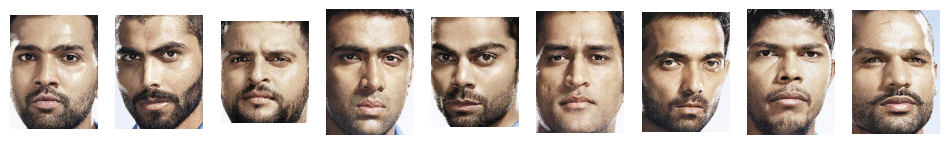

In [9]:
fig,axs=plt.subplots(1,9,figsize=(12,5))
for i, face in enumerate(faces):
    bbox=face['bbox']
    bbox=[int(b) for b in bbox]
    axs[i].imshow(cv2.cvtColor(india[bbox[1]:bbox[3],bbox[0]:bbox[2]], cv2.COLOR_BGR2RGB))
    axs[i].axis('off')

# Face Swapping

Download inswapper model from here: https://drive.google.com/file/d/1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF/view

In [10]:
# Load the INSwapper model
swapper=insightface.model_zoo.get_model('inswapper_128.onnx',download=False,dowmload_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


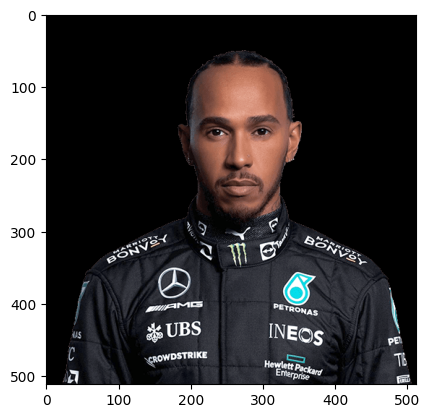

In [11]:
# Load the source image
source=cv2.imread("Lewis Hamilton.png")
plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
source_faces=app.get(source)
source_face = source_faces[0]

In [13]:
result = india.copy()

In [14]:
for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]

    # Check if the bounding box dimensions are valid
    if bbox[1] < bbox[3] and bbox[0] < bbox[2]:
        face_region = india[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        axs[i].imshow(cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB))
        axs[i].axis('off')
        
        # Perform face swapping for valid bounding boxes
        result = swapper.get(result, face, source_face, paste_back=True)
    else:
        # Handle the case of an invalid bounding box (skip or handle it)
        print(f"Invalid bounding box detected for face {i}")

# Plot the result

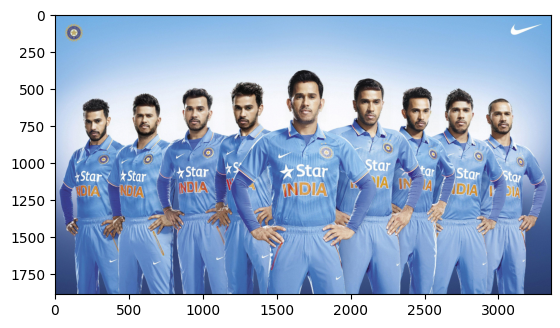

In [15]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

# Plot the swapped faces

In [16]:
res_faces=app.get(result)

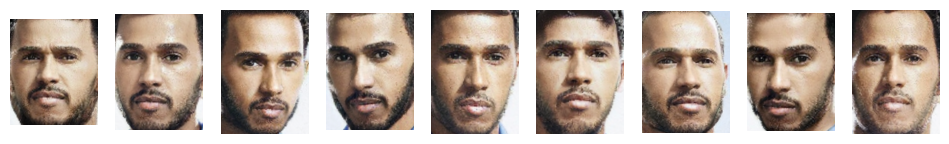

In [17]:
# Detect faces in the resulting image
res_faces = app.get(result)
fig, axs = plt.subplots(1, len(res_faces), figsize=(12, 5))

for i, face in enumerate(res_faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    # Check if the bounding box dimensions are valid
    if bbox[1] < bbox[3] and bbox[0] < bbox[2]:
        face_region = result[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        axs[i].imshow(cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB))
        axs[i].axis('off')
    else:
        # Handle the case of an invalid bounding box (you can skip or handle it as needed)
        print(f"Invalid bounding box detected for face {i}")
plt.show()

# Swapping in an image with one face

## Source Image

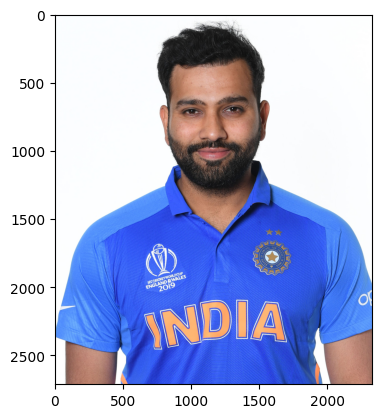

In [18]:
rohit=cv2.imread('rohit.jpg')
plt.imshow(cv2.cvtColor(rohit, cv2.COLOR_BGR2RGB))
plt.show()

## Target Image

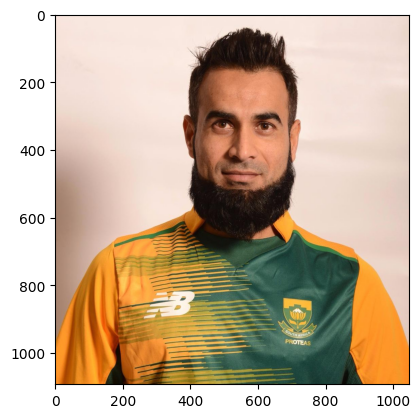

In [19]:
imran=cv2.imread('imran.jpg')
plt.imshow(cv2.cvtColor(imran, cv2.COLOR_BGR2RGB))
plt.show()

## Detect the faces

In [20]:
rohit_faces=app.get(rohit)
imran_faces=app.get(imran)

In [21]:
# Assume that you have only one face in each image
rohit_face = rohit_faces[0]
imran_face = imran_faces[0]

In [22]:
result=imran.copy()

## Perform Swapping

In [23]:
res = swapper.get(result, imran_face, rohit_face, paste_back=True)

## Plot the swapped image

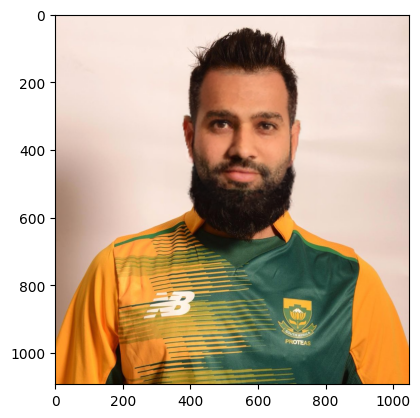

In [24]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()